In [1]:
import tensorflow as tf
from functools import partial
import matplotlib.pyplot as plt
import os
from drive.MyDrive.Lab_demo.tfrecord import *
import numpy as np

In [2]:
datapath='/content/drive/MyDrive/Lab_demo' #Data path

os.listdir(datapath) #print out the files in the target folder

['test_data.tfrecord',
 'train_data.tfrecord',
 'tfrecord.py',
 'utilities.py',
 '__pycache__']

In [3]:
def load_dataset(filenames):
    ignore_order = tf.data.Options()
    ignore_order.experimental_deterministic = False  # disable order, increase speed
    dataset = tf.data.TFRecordDataset(
        filenames
    )  # automatically interleaves reads from multiple files
    dataset = dataset.with_options(
        ignore_order
    )  # uses data as soon as it streams in, rather than in its original order
    dataset = dataset.map(decode_parse_fn)
    return dataset


In [9]:
def get_dataset(filenames):
    dataset = load_dataset(filenames)
    # dataset = dataset.shuffle(2048)
    dataset = dataset.prefetch(buffer_size= tf.data.AUTOTUNE)
    dataset = dataset.batch(128)
    return dataset

* Inputs_batch : pressure data ->state
* outputs_batch: action output
* name_batch : sensor name

In [5]:
def Myplots(X_, y_,title):
    """ Plot function with Inputs (values) and predictions with Predicted Labels
    :params X_: input first data as 2D-specturm
    :params y1_:  as output labels series (ie. predicts)
    :params title: graph title
    """
    ax1 = plt.subplot(211)
    plt.title(title)
    sound = np.transpose(X_)
    sound = 10. * np.log10(np.abs( sound)+1E-5)
    plt.imshow(sound, cmap='jet', interpolation='nearest', aspect='auto')
    plt.xlabel('Data series')
    plt.ylabel('Frequency features in specific FFT Length')
    plt.subplot(212, sharex = ax1)
    plt.stem(y_)
    plt.xlabel('Data series')
    plt.ylabel('Class')
    plt.xlim([0, np.size(y_)])
    plt.show()

(128, 512)
(128, 1)


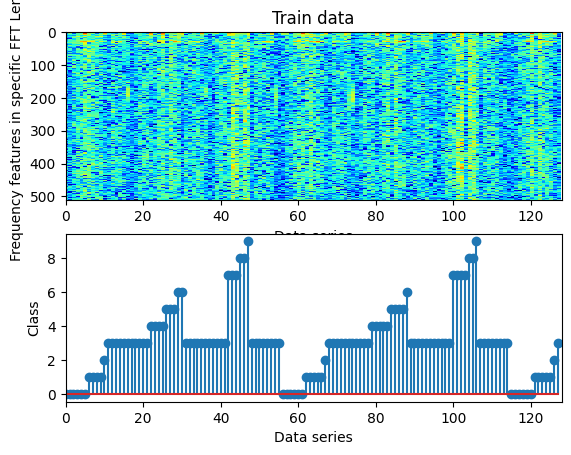

In [10]:
train_dataset = get_dataset(datapath+'/train_data.tfrecord')
Inputs_batch, outputs_batch, name_batch = next(iter(train_dataset))
print(np.shape(Inputs_batch))
print(np.shape(outputs_batch))
Myplots(Inputs_batch, outputs_batch, 'Train data')